#1. 문제정의
타이타닉 데이터를 통해 제공받은 여러 columns 정보들을 통해 생존율과 직접적인 연관성을 갖는 요인은 무엇인지 분석해본다.


#2. 데이터 수집
타이타닉 탑승자 데이터를 첨부받은 'titanic.csv'를 통해 데이터 프레임으로 불러온다.

In [ ]:
#프로젝트를 진행함에 필요한 모듈을 불러오기
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
#titanic.csv 마운팅 후 DataFrame으로 불러오기
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
df = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/인공지능 파이썬 Advance_변치웅 강사님/프로젝트오리엔테이션/titanic.csv')
df.tail()

,pclass,survived,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked,boat,body,home.dest
1304,3,0,"Zabour, Miss. Hileni",female,14.5,1,0,2665,14.4542,NaN,C,NaN,328.0,NaN
1305,3,0,"Zabour, Miss. Thamine",female,NaN,1,0,2665,14.4542,NaN,C,NaN,NaN,NaN
1306,3,0,"Zakarian, Mr. Mapriededer",male,26.5,0,0,2656,7.2250,NaN,C,NaN,304.0,NaN
1307,3,0,"Zakarian, Mr. Ortin",male,27.0,0,0,2670,7.2250,NaN,C,NaN,NaN,NaN
1308,3,0,"Zimmerman, Mr. Leo",male,29.0,0,0,315082,7.8750,NaN,S,NaN,NaN,NaN


| 변수 | 설명 |
| ---- | ---- |
| pclass | 티켓 등급(1= 1등석, 2= 2등석, 3= 3등석) |
| survived | 생존 여부(생존: 1 사망: 0) |
| name | 이름 |
| sex | 성별 |
| age | 나이 |
| sibsp | 동반한 형제/자매와 배우자 |
| parch | 동반한 부모/자식 수 |
| ticket | 티켓 번호 |
| fare | 탑승 요금 |
| cabin | 선실 번호 |
| embarked | 승선지 |
| boat | 보트 탑승 여부 |
| body | 사망자 확인 번호 |
| home.dest | 고향 / 목적지 |


데이터 타입과 결측값을 확인한다.

In [ ]:
#데이터 타입
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1309 entries, 0 to 1308
Data columns (total 14 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   pclass     1309 non-null   int64  
 1   survived   1309 non-null   int64  
 2   name       1309 non-null   object 
 3   sex        1309 non-null   object 
 4   age        1046 non-null   float64
 5   sibsp      1309 non-null   int64  
 6   parch      1309 non-null   int64  
 7   ticket     1309 non-null   object 
 8   fare       1308 non-null   float64
 9   cabin      295 non-null    object 
 10  embarked   1307 non-null   object 
 11  boat       486 non-null    object 
 12  body       121 non-null    float64
 13  home.dest  745 non-null    object 
dtypes: float64(3), int64(4), object(7)
memory usage: 143.3+ KB


In [ ]:
#데이터 결측값
df.isna().sum()

pclass          0
survived        0
name            0
sex             0
age           263
sibsp           0
parch           0
ticket          0
fare            1
cabin        1014
embarked        2
boat          823
body         1188
home.dest     564
dtype: int64

* cabin(선실번호), boat(보트 탑승 여부), body(사망자 확인 번호)값은 결측값이 과반수를 넘어가므로 분석에서 제외한다.

*ticket(티켓번호), home.dest(고향/목적지), embarked(승선지), name(이름)값은 생존율과 관련없기때문에 분석에서 제외한다. 

In [ ]:
df_1 = df.drop(['cabin','boat','body','ticket','home.dest','embarked','name'],axis='columns')
df_1.head(7)

,pclass,survived,sex,age,sibsp,parch,fare
0,1,1,female,29.00,0,0,211.3375
1,1,1,male,0.92,1,2,151.5500
2,1,0,female,2.00,1,2,151.5500
3,1,0,male,30.00,1,2,151.5500
4,1,0,female,25.00,1,2,151.5500
5,1,1,male,48.00,0,0,26.5500
6,1,1,female,63.00,1,0,77.9583


문자열인 sex(성별)값을 male(남성, 1), female(여성, 2)로 변환한다.

In [ ]:
sex_mapping = {'male': 1 , 'female': 2}
df_1['sex'] = df_1['sex'].map(sex_mapping)
df_1

,pclass,survived,sex,age,sibsp,parch,fare
0,1,1,2,29.00,0,0,211.3375
1,1,1,1,0.92,1,2,151.5500
2,1,0,2,2.00,1,2,151.5500
3,1,0,1,30.00,1,2,151.5500
4,1,0,2,25.00,1,2,151.5500
...,...,...,...,...,...,...,...
1304,3,0,2,14.50,1,0,14.4542
1305,3,0,2,NaN,1,0,14.4542
1306,3,0,1,26.50,0,0,7.2250
1307,3,0,1,27.00,0,0,7.2250


sibsp(동반한 형제/자매 배우자 수)와 parch(동반한 부모/자식 수)는 비슷한 항목이므로 두 값을 합친 family(가족 수) column을 만들어 추가한다.

In [ ]:
df_1['family'] = df['sibsp']+df['parch']
df_1

,pclass,survived,sex,age,sibsp,parch,fare,family
0,1,1,2,29.00,0,0,211.3375,0
1,1,1,1,0.92,1,2,151.5500,3
2,1,0,2,2.00,1,2,151.5500,3
3,1,0,1,30.00,1,2,151.5500,3
4,1,0,2,25.00,1,2,151.5500,3
...,...,...,...,...,...,...,...,...
1304,3,0,2,14.50,1,0,14.4542,1
1305,3,0,2,NaN,1,0,14.4542,1
1306,3,0,1,26.50,0,0,7.2250,0
1307,3,0,1,27.00,0,0,7.2250,0


#3. 데이터 탐색
생존율과 각 요인들과의 분포를 시각화해보면 아래와 같다.

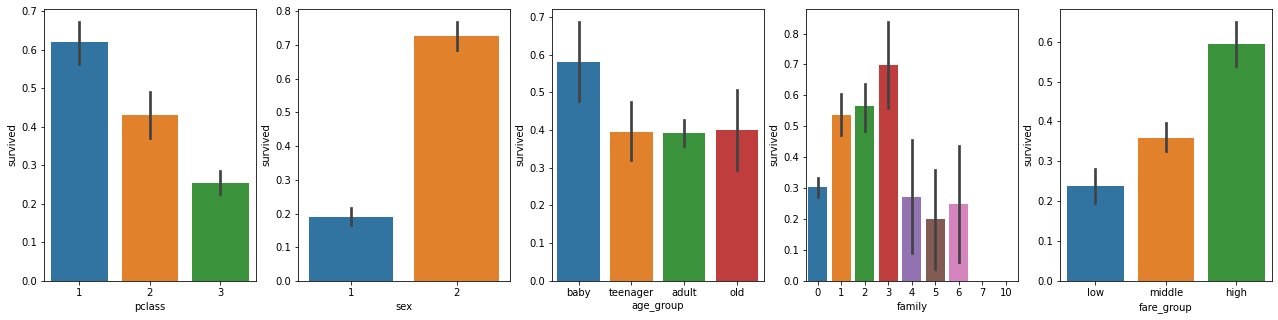

In [ ]:
#나이와 요금은 범위가 너무 넓으므로 범위를 설정하여 분류한다.
df_1['age_group'] = pd.cut(df_1['age'], bins=[0, 10, 20, 50, 100], 
                             include_lowest=True, labels=['baby', 'teenager', 'adult', 'old'])
df_1['fare_group'] = pd.cut(df_1['fare'], bins=[0, 8, 32, 520], 
                             include_lowest=True, labels=['low', 'middle', 'high'])


fig = plt.figure(figsize=(22,5))
graph1 = fig.add_subplot(1,5,1)
graph2 = fig.add_subplot(1,5,2)
graph3 = fig.add_subplot(1,5,3)
graph4 = fig.add_subplot(1,5,4)
graph5 = fig.add_subplot(1,5,5)

sns.barplot(x = 'pclass', y = 'survived', data = df_1, ax=graph1)
sns.barplot(x= 'sex', y= 'survived', data=df_1, ax=graph2)
sns.barplot(x= 'age_group',y= 'survived', data=df_1, ax=graph3)
sns.barplot(x= 'family', y='survived', data=df_1, ax=graph4)
sns.barplot(x= 'fare_group',y= 'survived', data=df_1, ax=graph5)

# ** 위의 그래프를 통해 알 수 있는 점은?**

**1. 티켓 등급이 높을수록 생존율이 높았다.**

- 보통 높은 등급의 선실일수록 전망이 좋은 고층에 위치하기때문에 상황파악 및 대피에 유리했을 것이다.

**2. 남성 보다는 여성이 생존율이 높았다.**
- 여성과 노약자를 우선적으로 구명정에 태웠으므로 생존율이 더 높다.

**3. 유아(baby)를 제외한 나이대에서는 나이에 따른 생존율 차이는 거의 없다.**
- 유아,십대,노인 그룹에서 생존율이 높게 나왔을 것이라 예상했지만 그렇지않았다. 
유아를 제외한 나머지 노약자층에서는 왜 생존율이 비슷한지 분석이 필요해보인다.

**4. 함께 탑승한 인원이 1~3명 정도일 때가 혼자 승선했거나 4명 이상이 함께 승선했을 때보다 생존율이 높다.**
- 함께 탑승한 가족수가 1 ~ 3명 일 때 생존율이 높은 특별한 이유가 있을까? 성별,나이와 비교하여 어떤 사람들이 구조 대상이었는지 분석이 필요하다.

**5. 높은 비용을 지불하고 탑승한 그룹이 생존율이 높았다.**
- 암표 같은 특수한 상황을 제외하면 티켓 등급과 지불 비용은 대체로 비례하기 때문에 1번과 같은 이유로 높은 비용을 낸 사람은 생존율이 높았다.


> 단순히 분포도만 보고 판단해보면, 생존율에 영향을 미치는 요인은?

- 티켓 등급(가격)
- 성별
- (함께 탑승한) 가족 구성원 수

# 분석 대상

1. 영화 '타이타닉'을 통해 우리는 여성이 남성보다, 그리고 청년층보다는 노약자층이 구명보트에 탑승했다는 사실을 알고있다. 
하지만 나이별 생존율을 보면 0~10세 유아층을 제외한 나머지 나이층은 생존율이 0.4정도로 비슷하게 나타났다. 
왜 유아를 제외한 노약자층의 생존율이 낮게 나왔는지 분석해보자.

2. 함께 탑승한 가족의 수가 4명 이상일 때는 혼자서 탑승했을 경우보다 생존율이 더 낮았다. 위급상황에서 4명 이상의 가족을 챙길 여유가 없을 것이기 때문이다. 하지만 함께 탑승한 가족의 수가 1 ~ 3명인 경우 생존율은 20 ~ 40% 정도 상승하였다. 왜 이런 결과가 나왔는지 분석해보자

#4. 데이터 전처리

본격적인 데이터 분석에 앞서 데이터를 다루기 쉽도록 데이터 전처리를 해야하는데, 남녀 문자열을 int값으로 변환하기 같은 기본적인 전처리는 '2. 데이터 수집' 단계에서 다뤘으므로 추가적인 전처리 단계없이 진행하겠다.

#5. 모델링 & 평가
# 5 - 1. 왜 영유아층을 제외한 나머지 노약자층의 생존율은 성인과 생존율 차이가 크지 않을까?

(단, 나이 결측치 값은 임의로 선택하여 입력하지 않고 있는 자료로만 분석하였습니다.)

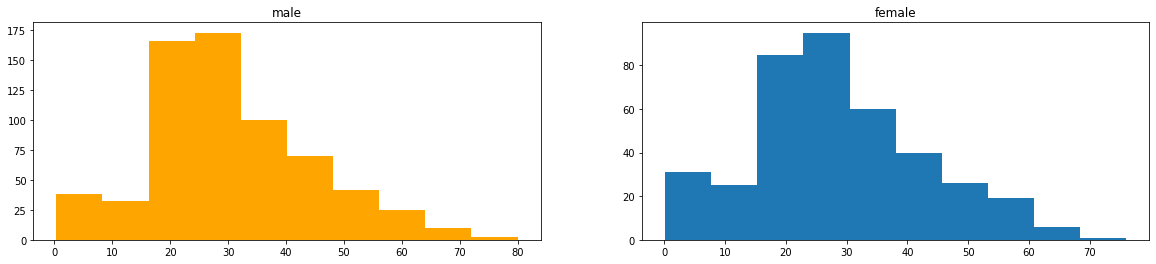

In [ ]:
#남녀의 연령별 분포
male = df_1.loc[df_1.sex == 1]
female = df_1.loc[df_1.sex == 2]

plt.figure(figsize=(20, 4))
plt.subplot(1,2,1)
plt.title("male")
plt.hist(male.age, bins=10, color='orange')

plt.subplot(1,2,2)
plt.title("female")
plt.hist(female.age, bins=10)

plt.show()

먼저 남녀의 연령별 분포를 보면, 남녀 모두 성인(20~50대)가 많고 노약자는 적은 모습을 보이고 각 나이대별 인구 분포 모습도 유사하게 나타난다.

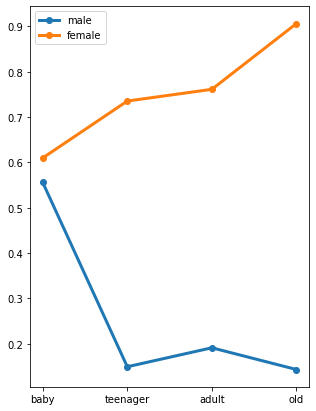

In [ ]:
#나이 그룹별 남녀의 생존율
titanic_group1 = df_1.groupby(['age_group','sex'])['survived']
titanic_group1_df = pd.DataFrame(titanic_group1.mean())
titanic_group1_df.reset_index(inplace=True)

titanic_group1_df_male = titanic_group1_df.loc[titanic_group1_df['sex'] == 1]
titanic_group1_df_female = titanic_group1_df.loc[titanic_group1_df['sex'] == 2]
titanic_group1_df_male = titanic_group1_df_male.groupby('age_group').mean()
titanic_group1_df_female = titanic_group1_df_female.groupby('age_group').mean()

plt.figure(figsize=(5,7))
plt.plot(titanic_group1_df_male.index, titanic_group1_df_male.survived,
        linewidth=3, marker='o', label='male')
plt.plot(titanic_group1_df_female.index, titanic_group1_df_female.survived,
        linewidth=3, marker='o', label='female')
plt.legend(loc='upper left')

plt.show()

이어서 나이 그룹별 생존율을 보면 영유아의 생존율은 남녀 모두 60%정도로 비슷하지만, 

청소년부터 노인까지의 나이대에서는 여성은 70% 이상의 높은 생존율, 

남성은 20% 이하의 매우 낮은 생존율을 보이는 결과를 알 수 있다.


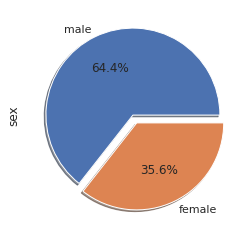

In [ ]:
#남녀성비
labels = ['male','female']
df_1["sex"].value_counts().plot.pie( explode=[0,0.1],labels = labels, autopct='%1.1f%%', shadow=True)
plt.show()

마지막으로 남녀의 성비 분포그래프를 보면 남녀 성비가 6:4정도로 남성이 여성보다 1.5배정도 많음을 알 수 있다.

> 5 - 1번 문제 분석결과

위에서 분석한 결과로 정리해보면, 
전체 남성의 수가 전체 여성의 수보다 거의 2배정도 많기 때문에 여성의 높은 생존율이 표본이 더 많은 남성의 낮은 생존율로 인해 평균적인 생존율이 감소한 것이다.

반면 10세 이하의 영유아 나이대에서는 남아/여아 구분없이 모두 우선 구조 대상이었기 때문에 남녀 모두 높은 생존율을 보였다.




# 5 - 2. 함께 탑승한 가족의 수가 1 ~ 3명일 때 생존율이 상승하는 특별한 이유는?

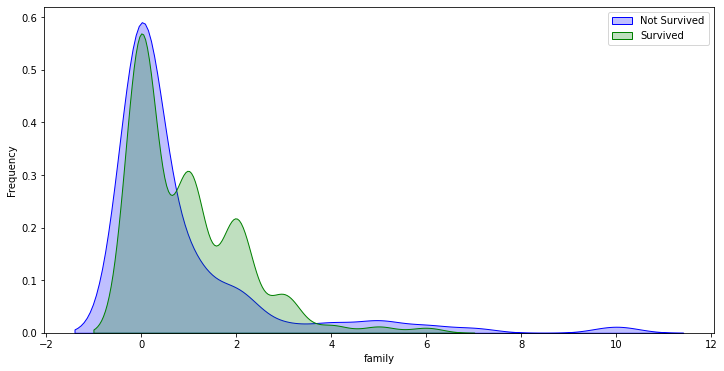

In [ ]:
#함께 탑승한 가족 수에 따른 생존/사망율
fig = plt.figure(figsize=(12,6))

graph_1 = fig.add_subplot(1,1,1)
sns.kdeplot(df_1["family"][(df_1["survived"] == 0) & (df_1["family"].notnull())], 
                ax = graph_1, color="Blue", shade = True)
sns.kdeplot(df_1["family"][(df_1["survived"] == 1) & (df_1["family"].notnull())], 
                ax =graph_1, color="Green", shade= True)
graph_1.set_xlabel("family")
graph_1.set_ylabel("Frequency")
graph_1.legend(["Not Survived","Survived"])

위의 동승한 가족 수에 따른 생존율을 보면 가족수가 적을 수록 생존율도 높고 사망율도 낮아짐을 볼 수 있다.
하지만 생존율이 사망율을 앞서는 값은 동승 가족이 1~3명일때 뿐이다.

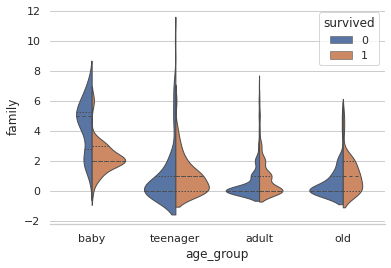

In [ ]:
#연령에 따른 가족 수와 생존율의 관계
sns.set_theme(style="whitegrid")

sns.violinplot(data=df_1, x="age_group", y="family", hue="survived", split=True, inner="quart", linewidth=1)
sns.despine(left=True)

나이대와 관련이 있지 않을까 해서 분석해 보았다. 동승 가족수가 1~3명일때 영유아층의 분포가 많음을 알 수 있다.

5-1에서 확인 한 바와 같이 영유아 나이대의 생존율은 다른 연령들보다 높기 때문에 어느정도 영향을 준 것 같다.

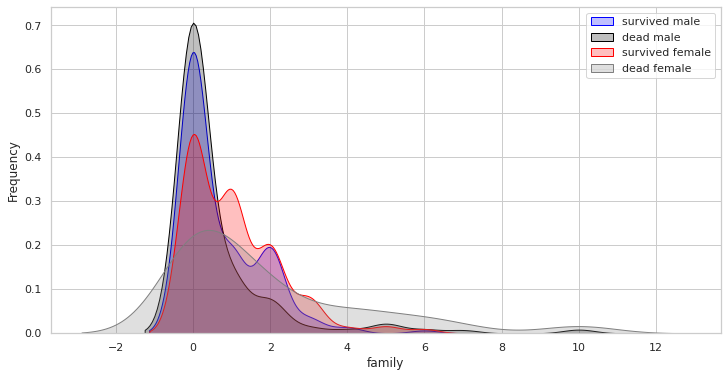

In [ ]:
fig = plt.figure(figsize=(12,6))

graph_2 = fig.add_subplot(1,1,1)

sns.kdeplot(df_1["family"][(df_1["survived"] == 1) & (df_1["family"].notnull()) & (df_1['sex'] == 1)], 
                ax =graph_2, color="blue", shade= True)
sns.kdeplot(df_1["family"][(df_1["survived"] == 0) & (df_1["family"].notnull()) & (df_1['sex'] == 1)], 
                ax =graph_2, color="black", shade= True)
sns.kdeplot(df_1["family"][(df_1["survived"] == 1) & (df_1["family"].notnull()) & (df_1['sex'] == 2 )], 
                ax =graph_2, color="red", shade= True)
sns.kdeplot(df_1["family"][(df_1["survived"] == 0) & (df_1["family"].notnull()) & (df_1['sex'] == 2 )], 
                ax =graph_2, color="gray", shade= True)

graph_2.set_xlabel("family")
graph_2.set_ylabel("Frequency")
graph_2.legend(["survived male","dead male","survived female","dead female"])

추가적으로 '혹시 성별 차이로 인해 차이가 발생한 것일까?'해서 남녀 그룹을 생존 여부에 따라 분류해 보았다. 분석해본결과 성별 역시 큰 원인이 될 수 있을 것 같다. 

남녀 모두 동승한 인원이 적을수록 생존율이 높았지만, 남성은 혼자서 타이타닉호에 승선했을 때 사망율이 급격히 상승하였고 여성은 비교적 낮은 사망율을 보였기에 동승한 가족 수가 0명 일때만 연속적인 결과(동승 가족 수가 적을수록 생존율 상승)가 나타나지 않은 것이다.

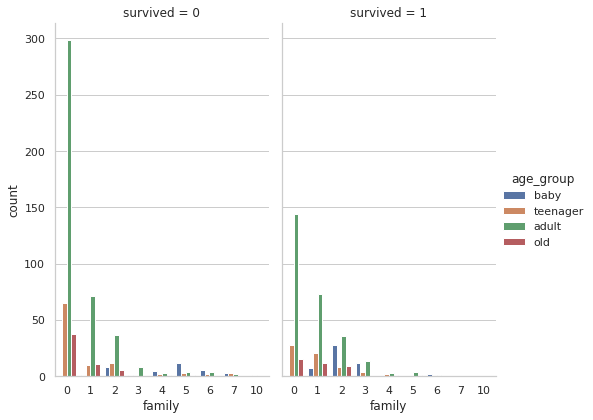

In [ ]:
sns.catplot(x='family',hue='age_group',col='survived',data=df_1,kind='count',height =6,aspect=.6);

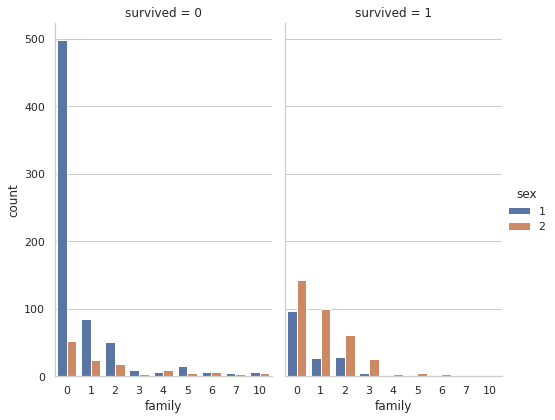

In [ ]:
sns.catplot(x='family',hue='sex',col='survived',data=df_1,kind='count',height =6,aspect=.6);

위의 두 그래프를 보면 더욱 확연히 알 수 있다. 단독으로 배에 올랐을 때 남성의 사망율이 거의 4배정도 높음을 알 수 있다.

# 5 - 2번 문제 분석결과

지금까지 분석한 결과로 결론을 내보자면, 
일반적으로 함께 배에 탑승한 가족의 수가 적을수록 생존율은 상승한다.

다만, 타이타닉호의 경우 구명정이 부족한 상황에서 여성과 노약자를 우선적으로 구조하는 특수한 상황이 일어났고, 그 결과 함께 탑승한 가족이 0명이어도 가장 사망자가 많아 '동승자 0명대'의 생존율이 낮게 나온 결과가 나오게 되었다. 


#6. 결과

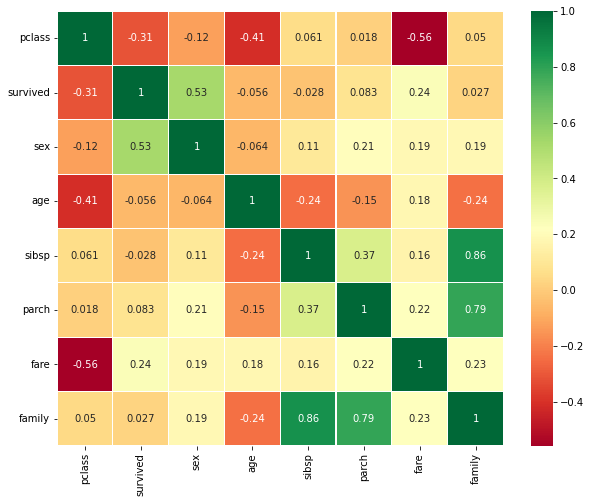

In [ ]:
#각 요인들의 상관관계를 나타낸 히트맵
sns.heatmap(df_1.corr(), annot=True, cmap='RdYlGn', linewidths=0.2)
fig=plt.gcf()
fig.set_size_inches(10, 8)
plt.show()

생존율에 직접적으로 영향을 미치는 요인으로는 성별, 티켓 등급,탑승요금이다.

이 외에 나이나 같이 탑승한 가족 수 등도 간접적으로 영향을 끼치기도 한다.